# Four-level atom
Along the lines of:

Large Kerr nonlinearity with a single atom

1999 J. Opt. B: Quantum Semiclass. Opt. 1 490

(http://iopscience.iop.org/1464-4266/1/4/322)

In [1]:
import numpy as np
from qutip import *
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
one = basis(4,0)
two = basis(4,1)
three = basis(4,2)
four = basis(4,3)

sig11 = one * one.dag()
sig22 = two * two.dag()
sig33 = three * three.dag()
sig44 = four *four.dag()

sig34 = three * four.dag()
sig32 = three * two.dag()
sig12 = one * two.dag()

N = 10  # photon space

# Tensor space in the form |atom> (*) |photon>:
a = tensor(identity(4),destroy(N))
sig11 = tensor(sig11,identity(N))
sig22 = tensor(sig22,identity(N))
sig33 = tensor(sig33,identity(N))
sig44 = tensor(sig44,identity(N))

sig34 = tensor(sig34,identity(N))
sig32 = tensor(sig32,identity(N))
sig12 = tensor(sig12,identity(N))

In [65]:
kappa = 1
gamma = 0.1
gamma1 = gamma
gamma2 = gamma
gamma3 = gamma

delta = -0.2
Delta = 0.1
g = 5
g1 = g
g2 = g
OmC = 8
Ep = 0.6

collapse = [np.sqrt(kappa)*a, np.sqrt(gamma1)*sig12, np.sqrt(gamma2)*sig32, np.sqrt(gamma3)*sig34]

Hsys = delta*sig22 + Delta*sig44 + 1j*(g1*(a.dag()*sig12 - sig12.dag()*a) + g2*(a.dag()*sig34 - sig34.dag()*a) + OmC*(sig32 - sig32.dag()))
Hpump = 1j*Ep*(a - a.dag())
H = Hsys + Hpump

# initial state is in the ground level and no photons in the cavity
rho0 = ket2dm(tensor(one,basis(N,0))) 

In [66]:
tlist = np.linspace(0,10,100)
solution = mesolve(H, rho0, tlist, collapse, [sig11,sig22,sig33,sig44,a.dag()*a], Options(method='bdf'))

(-0.1, 0.5)

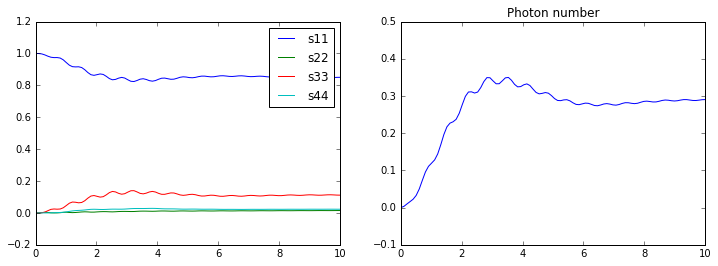

In [67]:
plt.figure(figsize=[12,4])
plt.subplot(121)
plt.plot(tlist,solution.expect[0],label="s11")
plt.plot(tlist,solution.expect[1],label="s22")
plt.plot(tlist,solution.expect[2],label="s33")
plt.plot(tlist,solution.expect[3],label="s44")
plt.ylim(-0.2,1.2)
plt.legend()

plt.subplot(122)
plt.plot(tlist,solution.expect[4],label="n")
plt.title("Photon number")
plt.ylim(-0.1,0.5)

In [68]:
g2 = coherence_function_g2(H, tlist, collapse, a)

/Users/dawes/anaconda/lib/python3.5/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


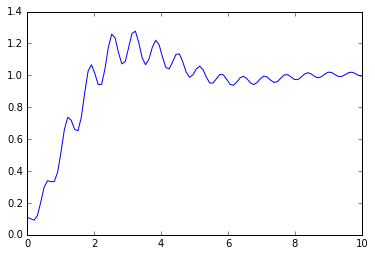

In [69]:
plt.plot(tlist,g2)